# **CSST 106**

**Verdad, Jane Benneth Dione**

**BSCS-4B**

**September 23, 2024**

**Exercise 2**

# **Feature Extraction and Object Detection**

In [3]:
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84


In [4]:
!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


In [5]:
# Clone OpenCV and contrib modules
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

fatal: destination path 'opencv' already exists and is not an empty directory.
fatal: destination path 'opencv_contrib' already exists and is not an empty directory.


In [6]:
# Create build directory
%cd opencv
!mkdir build
%cd build

# Configure with CMake
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..

!make -j8
!make install

/content/opencv
mkdir: cannot create directory ‘build’: File exists
/content/opencv/build
-- Detected processor: x86_64
-- Looking for ccache - not found
-- Could NOT find AVIF (missing: AVIF_LIBRARY AVIF_INCLUDE_DIR) 
-- The imported target "openjpip" references the file
   "/usr/lib/x86_64-linux-gnu/libopenjpip.so.2.4.0"
but this file does not exist.  Possible reasons include:
* The file was deleted, renamed, or moved to another location.
* An install or uninstall procedure did not complete successfully.
* The installation package was faulty and contained
   "/usr/lib/x86_64-linux-gnu/openjpeg-2.1/OpenJPEGTargets.cmake"
but not all the files it references.

-- The imported target "opj_decompress" references the file
   "/usr/bin/opj_decompress"
but this file does not exist.  Possible reasons include:
* The file was deleted, renamed, or moved to another location.
* An install or uninstall procedure did not complete successfully.
* The installation package was faulty and contained
   "

In [7]:
!pip install opencv-python-headless
!pip install opencv-contrib-python

  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 10.4 MB/s eta 0:00:00


# Task 1: SIFT Feature Extraction

**1. Import Libraries**

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**2. Load Image**

In [12]:
image = cv2.imread('/content/jane.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



**3. Apply the SIFT algo to detect and compute keypoints and descriptors**

<function matplotlib.pyplot.show(close=None, block=None)>

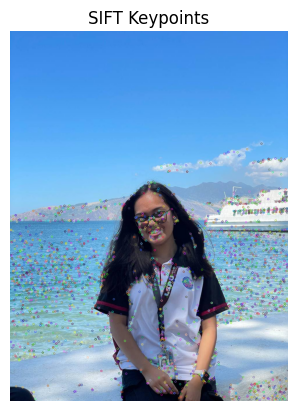

In [13]:
#Initialize the SIFT detector
sift =cv2.SIFT_create()

#Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

#Draw keypoints on the image
image_keypoints = cv2.drawKeypoints(image, keypoints, None)

#Display the image
plt.imshow(cv2.cvtColor(image_keypoints, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints")
plt.axis('off')
plt.show



# Task 2: SURF Feature Detection

**1. Load the image**

In [14]:
image = cv2.imread('/content/jane.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

**2. Apply SURF algorithm to detect and compute keypoints and descriptors**

<function matplotlib.pyplot.show(close=None, block=None)>

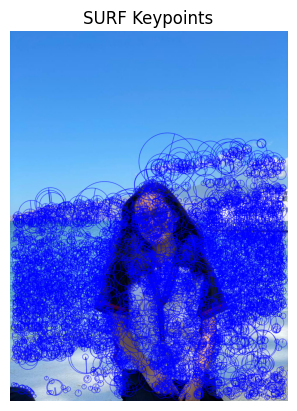

In [15]:
# Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_keypoints = cv2.drawKeypoints(
    image, keypoints, None, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

#Display the image
plt.imshow(cv2.cvtColor(image_keypoints, cv2.COLOR_BGR2RGB))
plt.title("SURF Keypoints")
plt.axis('off')
plt.show


# Task 3: ORB Feature Extraction

**1. Load the Image**

In [17]:
image = cv2.imread('/content/jane.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

**2. Apply the ORB algo to detect and compute descriptors.**

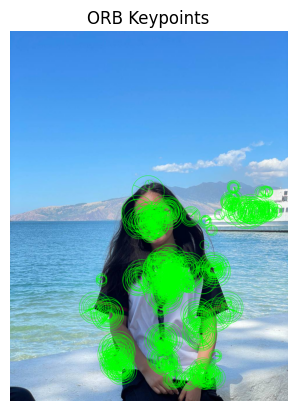

In [18]:
# Initialize ORB with more features and adjusted parameters
orb = cv2.ORB_create(nfeatures=1000, scaleFactor=1.2, nlevels=8)

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image with keypoint size and orientation
image_keypoints = cv2.drawKeypoints(
    image, keypoints, None, (0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
)

# Display the image
plt.imshow(cv2.cvtColor(image_keypoints, cv2.COLOR_BGR2RGB))
plt.title("ORB Keypoints")
plt.axis('off')
plt.show()


# Task 4: Feature Matching using SIFT

**1. Load the images**

In [20]:
image1 = cv2.imread('/content/benneth.jpg')
image2 = cv2.imread('/content/dione.jpg')

**2. Match features using Brute-Force Matching or Fast Library for Approximate Nearest Neighbors**

In [21]:
# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize the matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match Descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

**3. Display the matched keypoints**

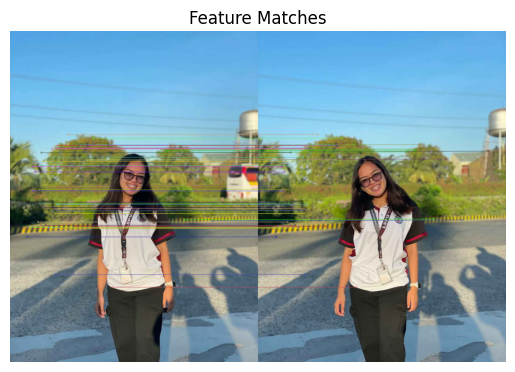

In [22]:
# Display the matches
plt.imshow(cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB))
plt.title("Feature Matches")
plt.axis('off')
plt.show()

# Task 5: Applications for Feature Matching

**1. Load the Image**

In [23]:
image1 = cv2.imread('/content/benneth.jpg')
image2 = cv2.imread('/content/dione.jpg')

#Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

**2. Apply feature matching to two images of the same scene taken from different angles or
perspectives.**  

In [24]:
#Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

#Match features using BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

#Apply ratio test (Lowe's ratio test)
good_matches = []
for m, n in matches:
  if m.distance <0.75 * n.distance:
    good_matches.append(m)

#Extract location of good matches
src_pts = np.float32(
    [keypoints1[m.queryIdx].pt for m in good_matches]
).reshape(-1, 1, 2)
dst_pts = np.float32(
    [keypoints2[m.trainIdx].pt for m in good_matches]
).reshape(-1, 1, 2)

#Find homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

#Warp one image to align with the other
h, w, _ = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

**3. Display the results**

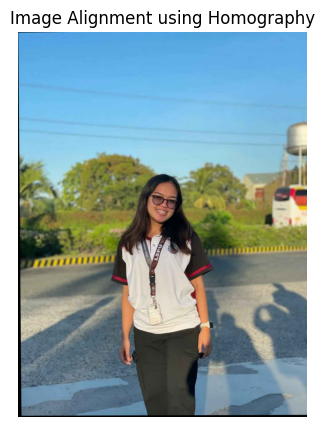

In [25]:
#Display the result
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Image Alignment using Homography')
plt.axis('off')
plt.show()

# Task 6: Combining SIFT and ORB

**1. Load Images**

In [28]:
image1 = cv2.imread('/content/benneth.jpg')
image2 = cv2.imread('/content/dione.jpg')

**2. Combine multiple feature extraction methods to extract features and match them between two images.**

In [29]:
# Initialize SIFT and ORB detectors
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

# Detect and compute SIFT features
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

# Detect and compute ORB features
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

# Match SIFT descriptors using Brute Force Matcher
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(descriptors1_sift, descriptors2_sift)

# Match ORB descriptors using Brute Force Matcher
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)

# Draw matches
image_matches_sift = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
image_matches_orb = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, matches_orb, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Combine the matched images for display
combined_image = cv2.hconcat([image_matches_sift, image_matches_orb])

**3. Display the Results**

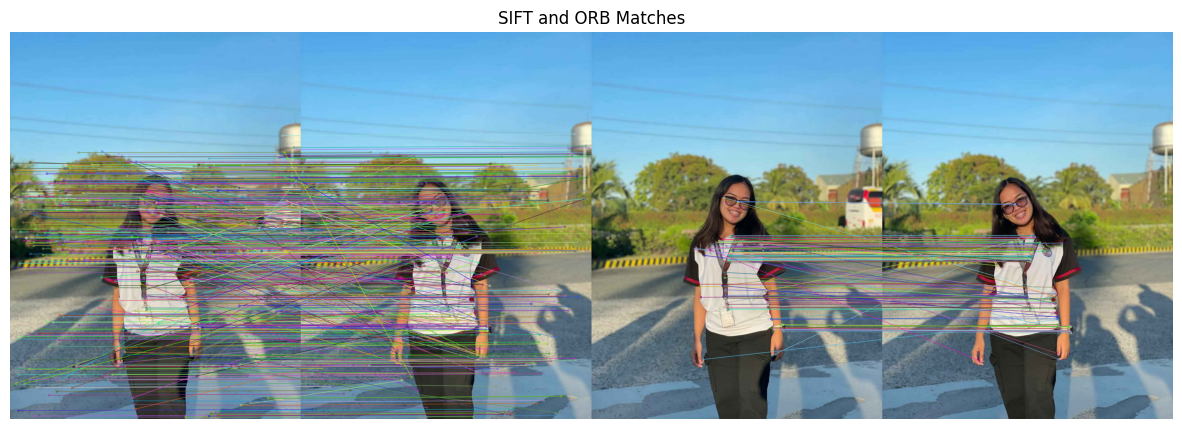

In [30]:
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title('SIFT and ORB Matches')
plt.axis('off')
plt.show()